# Euroleague Basketball Player Analysis

In this project, we aim to analyze Euroleague basketball player's (Nigel Hayes Davies) performance using machine learning techniques. We will explore the dataset to understand the key features, build predictive models, and evaluate their performance.

## Dataset
The dataset contains various attributes related to player performance, including points scored, assists, rebounds, and more. We aim to predict player performance metrics and gain insights into key factors that impact success in Euroleague games.

## Tools and Methods
- Data Preprocessing
- Feature Engineering
- Model Training and Evaluation (using cross-validation)
- RMSE for regression model performance

### Data Exploration/Visualization

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor  # or RandomForestClassifier depending on your task
from sklearn.model_selection import train_test_split

In [35]:
data = pd.read_csv("nhd_euroleague.csv") #dataset retrieved from :https://www.basketball-reference.com
data

,MP,FG%,AST,PTS,GmSc
0,30:42,0.000,0,0,-5.1
1,33:22,0.400,2,11,8.0
2,27:17,0.250,1,7,2.3
3,27:53,0.500,4,14,10.1
4,31:44,0.273,2,9,6.3
5,40:00,0.500,4,9,11.3
6,39:58,0.889,3,23,23.4
7,27:45,0.500,1,12,7.2
8,39:14,0.385,1,16,9.4
9,33:03,0.333,2,10,7.8


MP :minutes played in game,

FG% :Percantage of field goal,
AST :Asist,

GmSc : Game Score's +/- 

all data's are shown indiviually for specific game,which are shown in the index from website

In [36]:
# replacing the ":"s from the MP data to use our dataset for different visualization functions.
data['MP'] = data['MP'].apply(lambda x: int(x.split(':')[0]) + int(x.split(':')[1]) / 60)

In [37]:
data

,MP,FG%,AST,PTS,GmSc
0,30.700000,0.000,0,0,-5.1
1,33.366667,0.400,2,11,8.0
2,27.283333,0.250,1,7,2.3
3,27.883333,0.500,4,14,10.1
4,31.733333,0.273,2,9,6.3
5,40.000000,0.500,4,9,11.3
6,39.966667,0.889,3,23,23.4
7,27.750000,0.500,1,12,7.2
8,39.233333,0.385,1,16,9.4
9,33.050000,0.333,2,10,7.8


**pairplot for the visualize the relationship between the continous variables:** 

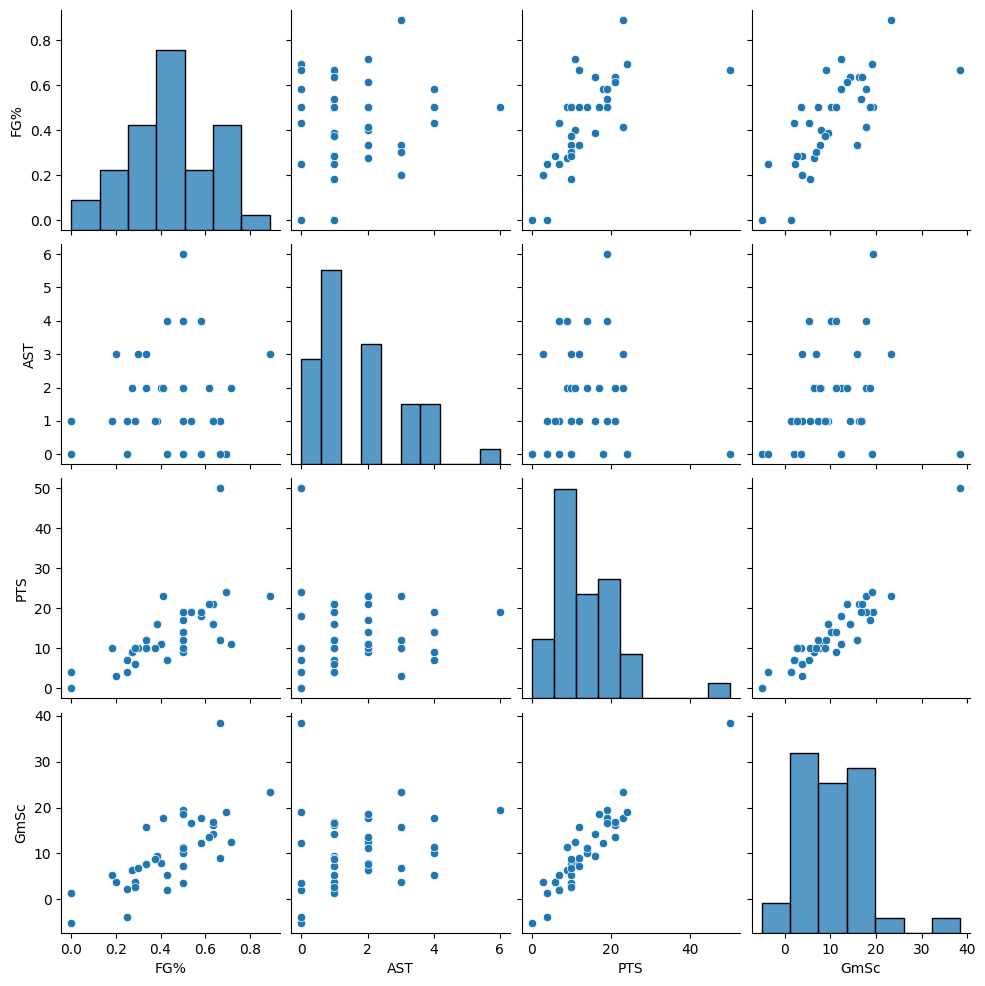

In [217]:
sns.pairplot(data)

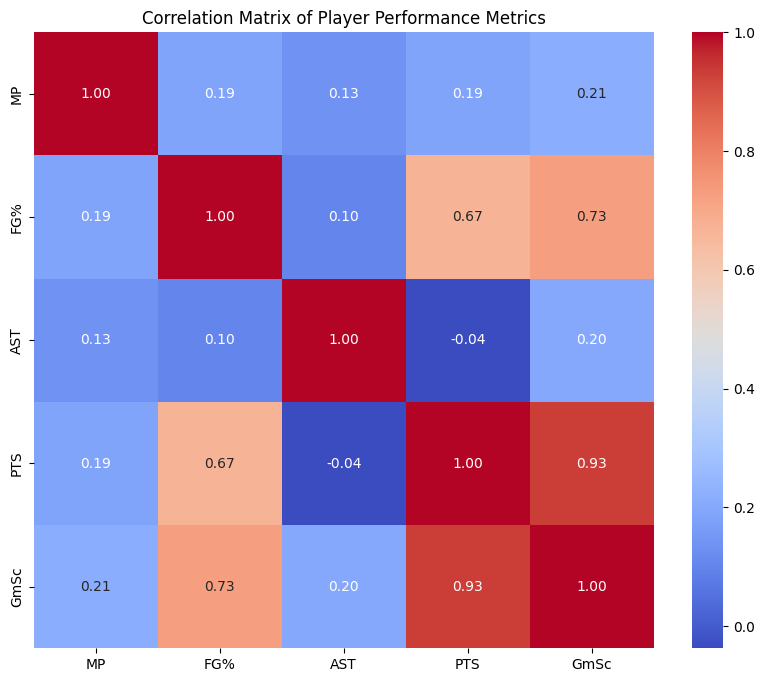

In [11]:
# Showing the correlation between key performance metrics.
corr_matrix = data.corr()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Player Performance Metrics')
plt.show()

**Checking for Outliers**

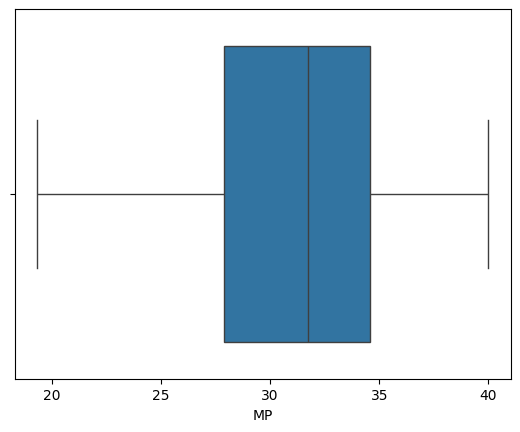

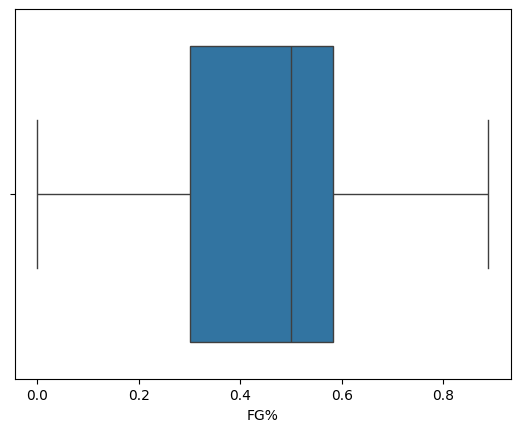

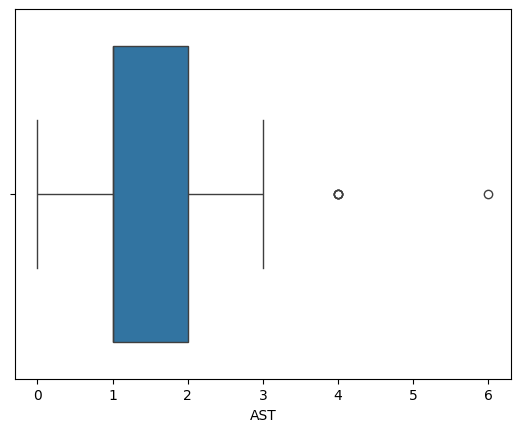

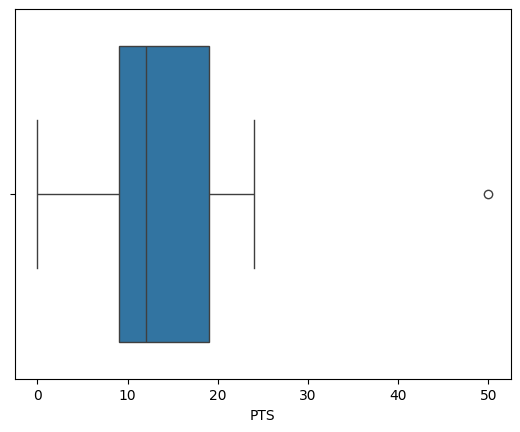

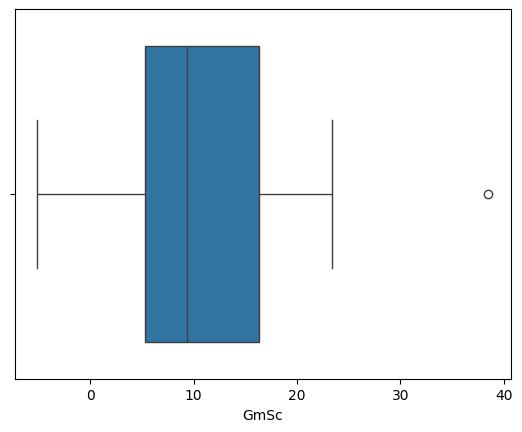

In [31]:
column_list = ["MP","FG%","AST","PTS","GmSc"]
for col in column_list:
    sns.boxplot(x = data[col])
    plt.xlabel(col)
    plt.show()

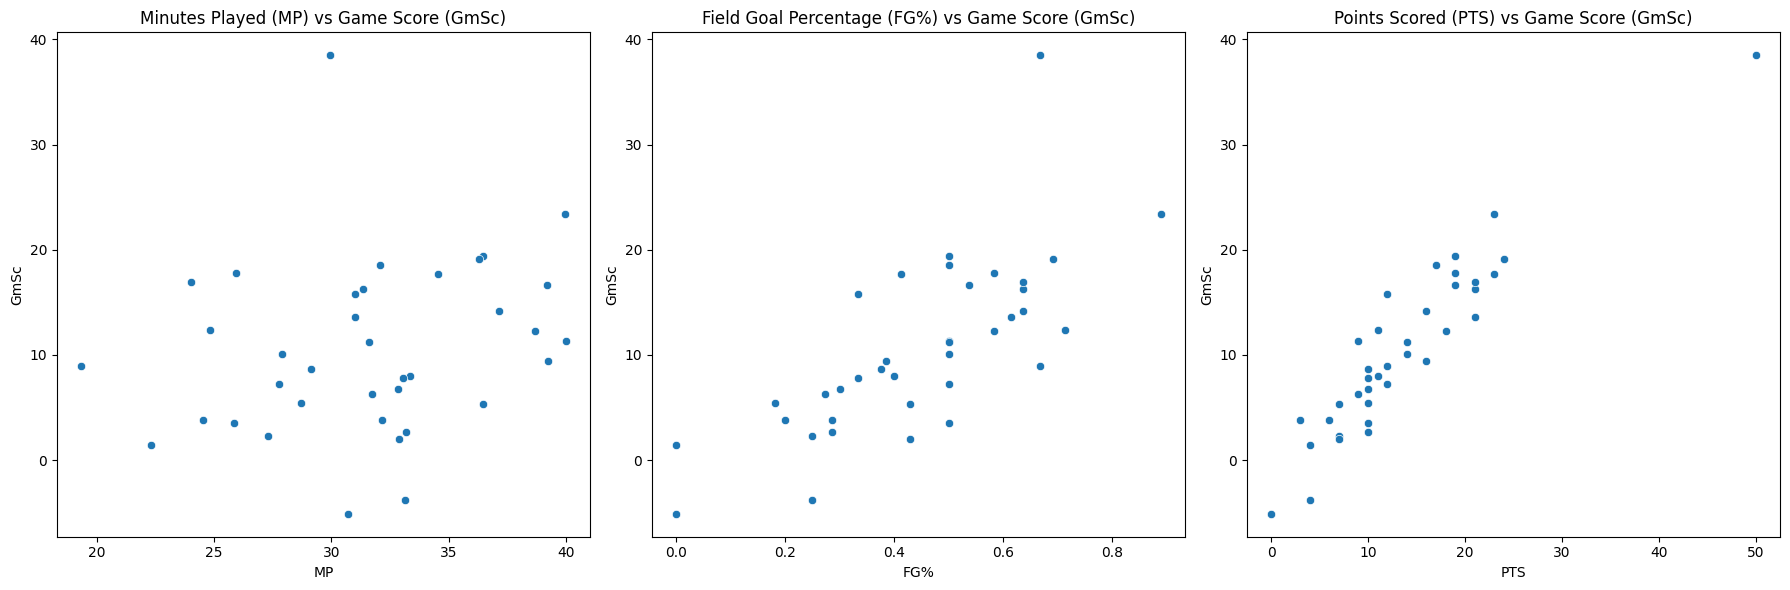

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1st
sns.scatterplot(x=data['MP'], y=data['GmSc'], ax=axes[0])
axes[0].set_title('Minutes Played (MP) vs Game Score (GmSc)')

# 2nd
sns.scatterplot(x=data['FG%'], y=data['GmSc'], ax=axes[1])
axes[1].set_title('Field Goal Percentage (FG%) vs Game Score (GmSc)')

# 3rd
sns.scatterplot(x=data['PTS'], y=data['GmSc'], ax=axes[2])
axes[2].set_title('Points Scored (PTS) vs Game Score (GmSc)')

# for a cleaner appearence
plt.tight_layout()
plt.show()

**checking the residuals and distribution**

### Modeling

 **If we want,we can use all independent variables but i prefer not to because of the results from the visualization of the correlation stats!**

In [59]:
# X = data.drop("GmSc",axis=1)

In [67]:
X = data[["FG%","PTS"]]

In [68]:
y = data["GmSc"]

In [69]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=13)

#### with Statsmodel 

In [71]:
model =  sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   GmSc   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                              270.3
Date:                Fri, 27 Sep 2024   Prob (F-statistic):                    1.39e-18
Time:                        14:53:57   Log-Likelihood:                         -73.904
No. Observations:                  29   AIC:                                      151.8
Df Residuals:                      27   BIC:                                      154.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FG%            2.4301      3.037      0.800      0.431      -3.802       8.662
PTS            0.7389      0.087      8.480      0.000       0.560       0.918
==============================================================================
Omnibus:                        0.041   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.980   Jarque-Bera (JB):                0.068
Skew:                           0.030   Prob(JB):                        0.967
Kurtosis:                       2.770   Cond. No.                         88.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
residuals = model.resid
residuals

15   -4.214506
6     4.245932
24   -0.161545
28   -2.430854
17   -0.761545
12   -2.416177
8    -3.357307
21   -7.362950
1    -1.099467
36    1.097412
27   -0.063766
0    -5.100000
29   -3.410514
31    0.400143
11    4.146660
9    -0.397794
35   -0.359048
13   -0.294927
5     3.435243
22    2.344965
14   -1.328148
2    -3.479524
30    1.354318
20   -1.555433
26   -5.103615
25    6.124489
16   -0.314204
10    0.832746
18    2.537492
dtype: float64

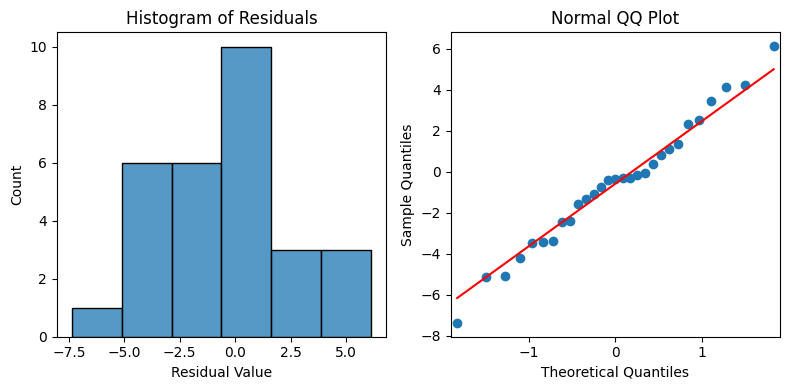

In [73]:
residuals = model.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

#histogram for distrubition of the residuals
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

#qq-plot for residiuals
sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal QQ Plot")

#for a cleaner appearance.
plt.tight_layout()
plt.show()

#### with Scikit 

In [82]:
model = LinearRegression().fit(X_train,y_train)
model.intercept_ #x=0
model.coef_ #katsayılar
model.score(X_train,y_train)

0.8997442515168143

### Prediction and Model Evaluation

In [75]:
print(f" Mean Of:\n MP: {data['MP'].mean():.2f}, \n FG%: {data['FG%'].mean():.3f}, \n AST: {data['AST'].mean():.2f}, \n PTS: {data['PTS'].mean():.2f}.")

 Mean Of:
 MP: 31.51, 
 FG%: 0.445, 
 AST: 1.70, 
 PTS: 13.76.


MSE: 6.749967468717454
RMSE: 2.5980699506975276
R^2: 0.6574055338806013


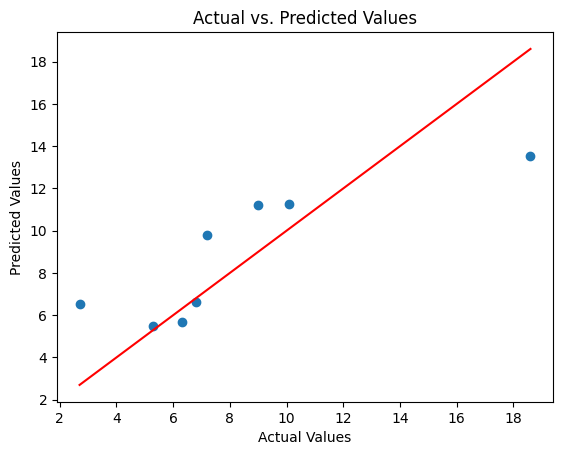

In [103]:
y_pred = model.predict(X_test)

# Measuring model performance
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

#plotting the Residual Plot (Actual vs. Predicted Values)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [76]:
new_data = [[0.5],[14],]
new_data = pd.DataFrame(new_data).T
new_data.columns = ["FG%","PTS"]
new_data

,FG%,PTS
0,0.5,14.0


**I checked the dataset and find similar values whereas the FG% was 0.5 and PTS was 14,If we look at that indexes we caan se that the assumption is close**

In [77]:
model.predict(new_data)

0    11.559048
dtype: float64

In [78]:
similar_rows = data[(data["FG%"] == 0.5) & (data["PTS"] == 14)]
print(similar_rows)

           MP  FG%  AST  PTS  GmSc
3   27.883333  0.5    4   14  10.1
35  31.616667  0.5    2   14  11.2


In [80]:
y_pred_new_data = model.predict(new_data)

# I am taking example of index no3 
y_true_new_data = [10.1]

# MSE 
mse_new_data = mean_squared_error(y_true_new_data, y_pred_new_data)

# RMSE
rmse_new_data = np.sqrt(mse_new_data)

print(f"new_data's MSE: {mse_new_data}")
print(f"new_data's RMSE: {rmse_new_data}")

new_data's MSE: 2.128822470535325
new_data's RMSE: 1.4590484812148379


**Evaluation**

In [100]:
mse_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
print("Mean of the Cross-Validated MSE Scores:", mse_scores.mean())

Mean of the Cross-Validated MSE Scores: 7.977826457148055


In [99]:
rmse_scores = np.sqrt(mse_scores)
print("Mean of the Cross-Validated RMSE Scores:", rmse_scores.mean())

Mean of the Cross-Validated RMSE Scores: 2.664980202117836


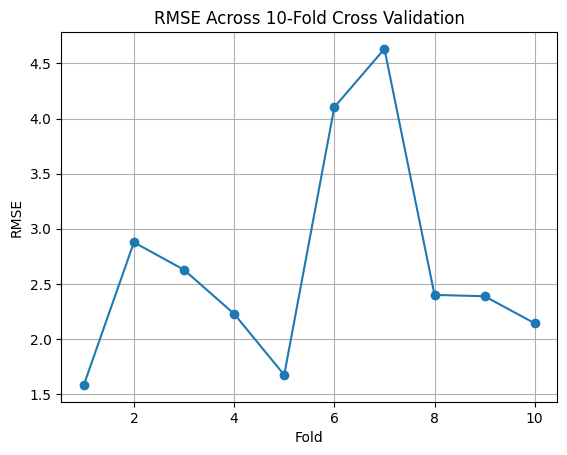

In [101]:
plt.plot(range(1, 11), rmse_scores, marker='o')
plt.title('RMSE Across 10-Fold Cross Validation')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

In [85]:
cross_val_score(model, X_train, y_train, cv= 10, scoring="r2").mean()

np.float64(0.5036238504230426)

## Conclusion

The regression model performed with an RMSE of 2.6, indicating relatively good accuracy. However, there is room for improvement, especially due to the unpredictable nature of sports data. Future work could focus on incorporating additional features such as player fatigue, game location, and team dynamics to enhance the model's predictive power.

We also observed strong correlations between player points, assists, and rebounds, suggesting that these metrics are closely tied to overall player performance in the Euroleague.
